# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [338]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [339]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
print(type(mapbox_token))

<class 'str'>


## Load Data

In [340]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.dropna(inplace=True)
#sfo_data.isnull().sum()
sfo_data["sale_price_sqr_foot"] = sfo_data["sale_price_sqr_foot"].astype("float")
sfo_data.tail()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390
2016,Visitacion Valley,328.319007,384242,4390
2016,Westwood Park,631.195426,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

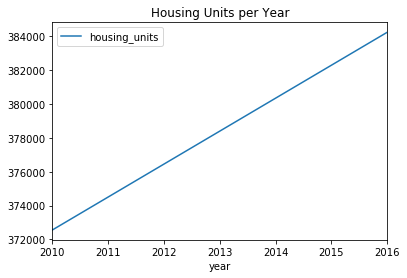

In [341]:
# Calculate the mean number of housing units per year (hint: use groupby)
sfo_mean_data = sfo_data.groupby('year').mean().reset_index()

sfo_mean_data.plot(
    x="year",
    y="housing_units",
    title="Housing Units per Year"
)

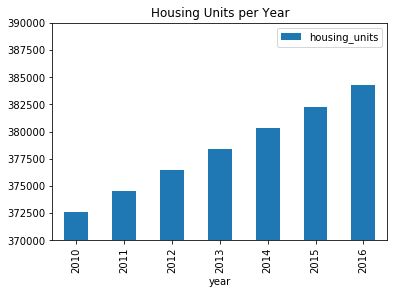

In [342]:
# Use the Pandas plot function to plot the average housing units per year.
sfo_mean_data.plot.bar(
    x="year",
    y="housing_units",
    ylim=(370000,390000),
    title="Housing Units per Year"
)


- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [343]:
# Calculate the average gross rent and average sale price per square foot

# All averages were calculated previously in new dataframe
sfo_mean_data


,year,sale_price_sqr_foot,housing_units,gross_rent
0,2010,369.344353,372560,1239
1,2011,341.903429,374507,1530
2,2012,399.389968,376454,2324
3,2013,483.600304,378401,2971
4,2014,556.277273,380348,3528
5,2015,632.540352,382295,3739
6,2016,697.643709,384242,4390


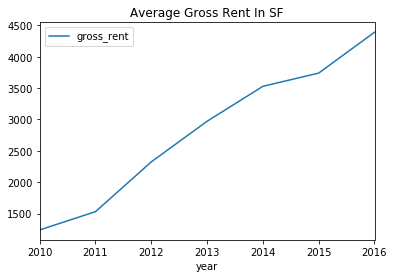

In [344]:
# Plot the Average Gross Rent per Year as a Line Chart 
sfo_mean_data.plot(
    x="year",
    y="gross_rent",
    title="Average Gross Rent In SF"
)

### Average Sales Price per Year

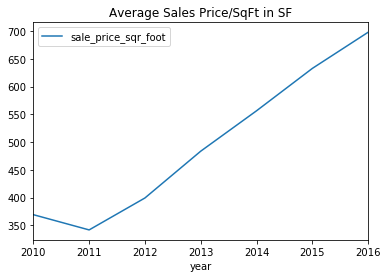

In [345]:
# Plot the Average Sales Price per Year as a line chart
sfo_mean_data.plot(
    x="year",
    y="sale_price_sqr_foot",
    title="Average Sales Price/SqFt in SF"
)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [346]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sf_neighborhood_mean_data = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
sf_neighborhood_mean_data.tail(50)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
342,2015,Union Square District,2258.702832,382295,3739
343,2015,Van Ness/ Civic Center,677.838232,382295,3739
344,2015,Visitacion Valley,302.221873,382295,3739
345,2015,Western Addition,481.469244,382295,3739
346,2015,Yerba Buena,963.522606,382295,3739
347,2016,Alamo Square,340.981835,384242,4390
348,2016,Anza Vista,88.401511,384242,4390
349,2016,Bernal Heights,986.842105,384242,4390
350,2016,Buena Vista Park,851.401405,384242,4390
351,2016,Central Richmond,661.064426,384242,4390


In [347]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sf_neighborhood_mean_data.hvplot(
    x="year",
    y="sale_price_sqr_foot"
)

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [348]:
# Getting the data from the top 10 expensive neighborhoods
sf_neighborhood_data = sfo_data.groupby(['neighborhood']).mean().sort_values("sale_price_sqr_foot",ascending=False)
sf_top10_data = sf_neighborhood_data.nlargest(10,columns=["sale_price_sqr_foot"])
sf_top10_data

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,377752.00,2663.666667
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [349]:
# Plotting the data from the top 10 expensive neighborhoods
sf_top10_data.hvplot.bar(
    x="neighborhood",
    y="sale_price_sqr_foot",
    xlabel="Neighborhood",
    ylabel="Avg Sale Price/SqFt",
    title='Top 10 SF Neighborhoods by Sales Price/SqFt',
    rot=45,
    height=400,
    width=650)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

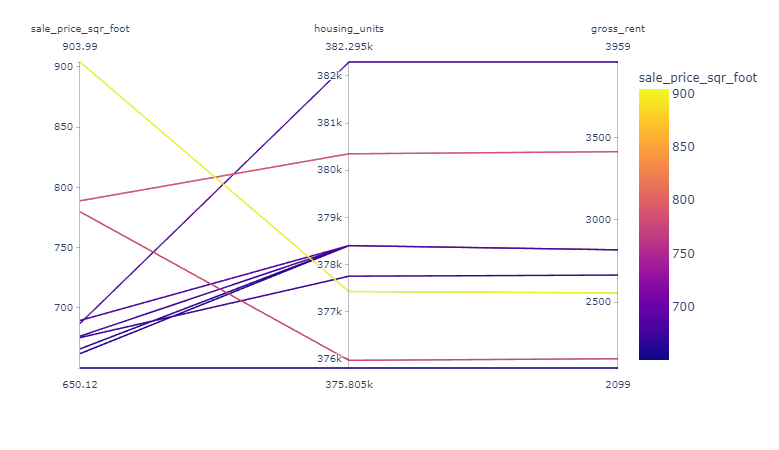

In [350]:
# Parallel Coordinates Plot
# it took a long time to sort out that this parallel thing needed the index to be separated...
sf_top10_data.reset_index(inplace=True)
px.parallel_coordinates(sf_top10_data,color="sale_price_sqr_foot")

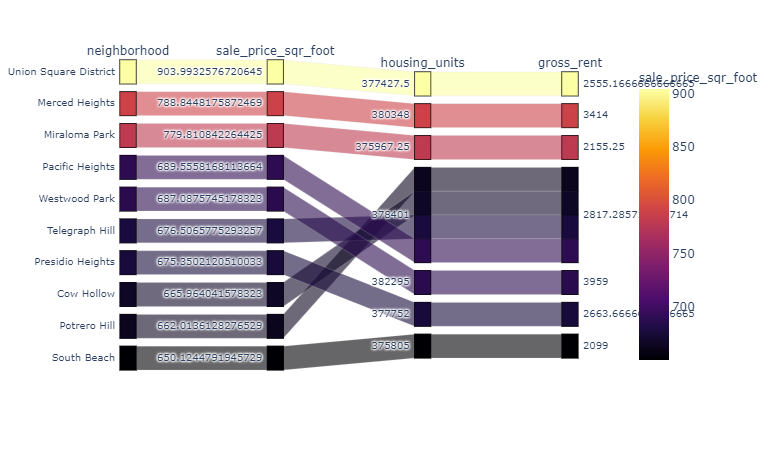

In [351]:
# Parallel Categories Plot
px.parallel_categories(
    sf_top10_data,
    dimensions=["neighborhood","sale_price_sqr_foot", "housing_units","gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [352]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
sf_neighborhood_locations = pd.read_csv(file_path)
sf_neighborhood_locations.sort_values("Neighborhood",ascending=True,inplace=True)
sf_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [353]:
# Calculate the mean values for each neighborhood
# already calculated earlier, reset index here..
sf_neighborhood_data.sort_values("neighborhood",ascending=True,inplace=True)
sf_neighborhood_data.reset_index(inplace=True)
sf_neighborhood_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [354]:
# Join the average values with the neighborhood locations
sf_full_neighborhood_data = pd.concat([sf_neighborhood_data,sf_neighborhood_locations],axis='columns',join='inner')
#sf_expand_neighborhood_data.dropna(inplace=True)
#sf_expand_neighborhood_data.isnull().sum()
sf_full_neighborhood_data = sf_full_neighborhood_data.drop(columns=["Neighborhood"])
sf_full_neighborhood_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,37.728630,-122.443050


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

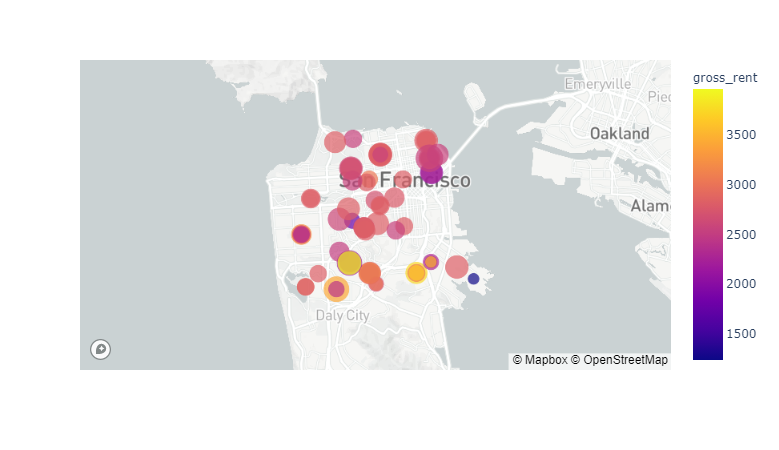

In [355]:
# Create a scatter mapbox to analyze neighborhood info
# Read in and setup the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)
#print(type(map_box_api))

#setup and map it
map = px.scatter_mapbox(
    sf_full_neighborhood_data,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=10
)
map.show()
